# Prosper Loan Data Exploration
## By Awurigwe Joseph

## Introduction

Prosper is a P2P lending platform that allows investors to choose among personal loans to invest in. They do that by considering a number of factors, which include a custom calculated Prosper Score that represents the risk for each loan. The higher the score, the lower the risk, and the lower the interest rates paid by the borrower to the investors.





## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Loading in the csv file to a dataframe and geting an overview with the head() function
df = pd.read_csv("prosperLoanData.csv")
df.head(10)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   
8         NaN    36    Current                  NaN      0.07620   
9         NaN    36    Current                  NaN      0.07620   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   
5        0.1314       0.1214  ...          -25.33                0.0   
6        0.2712       0.2612  ...          -22.95                0.0   
7        0.2019       0.1919  ...          -69.21                0.0   
8        0.0629       0.0529  ...          -16.77                0.0   
9        0.0629       0.0529  ...          -16.77                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   
5                    0.0                  0.0                             0.0   
6                    0.0                  0.0                             0.0   
7                    0.0                  0.0                             0.0   
8                    0.0                  0.0                             0.0   
9                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   
5            1.0                0                          0   
6            1.0                0                          0   
7            1.0                0                          0   
8            1.0                0                          0   
9            1.0                0                          0   

  InvestmentFromFriendsAmount Investors 

In [3]:
#getting the dimensions of the dataframe
df.shape

(113937, 81)

In [4]:
#dataframe and columns info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# getting a statistical summary of the numerical columns
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

There are a lot of data columns (81) in the datframe, so we're only going to work with what we need for the purpose of the analysis

In [6]:
target_columns =  [
    'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors', 'IncomeRange'
]

# creating a new dataframe with just the target columns

loan = df[target_columns]

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   BorrowerRate               113937 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   EmploymentStatus           111682 non-null  object 
 7   DelinquenciesLast7Years    112947 non-null  float64
 8   StatedMonthlyIncome        113937 non-null  float64
 9   TotalProsperLoans          22085 non-null   float64
 10  LoanOriginalAmount         113937 non-null  int64  
 11  LoanOriginationDate        113937 non-null  object 
 12  Recommendations            113937 non-null  int64  
 13  Investors                  11

The 'ProsperRating (Alpha)' is an integral aspect of our analysis. 
we have some missing values in the column, so we are going to drop rows with the missing values
Also, we'll make the column name one word so that we can use the dot notation on it. (same applies to 'ListingCategory (numeric)')

In [8]:
#renaming the column name
loan.rename(columns={'ProsperRating (Alpha)':'ProsperRating_Alpha', 'ListingCategory (numeric)':'ListingCategory_Numeric'}, inplace=True)
loan = loan.dropna(subset=['ProsperRating_Alpha']).reset_index()

C:\ProgramData\Anaconda3\envs\my_env\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
#filling in the missing values in 'TotalProsperLoans' with 0
loan.TotalProsperLoans.fillna(value=0, inplace=True)

In [10]:
loan['LoanOriginationDate'] = pd.to_datetime(loan['LoanOriginationDate'])

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    84853 non-null  int64         
 1   Term                     84853 non-null  int64         
 2   LoanStatus               84853 non-null  object        
 3   BorrowerAPR              84853 non-null  float64       
 4   BorrowerRate             84853 non-null  float64       
 5   ProsperRating_Alpha      84853 non-null  object        
 6   ListingCategory_Numeric  84853 non-null  int64         
 7   EmploymentStatus         84853 non-null  object        
 8   DelinquenciesLast7Years  84853 non-null  float64       
 9   StatedMonthlyIncome      84853 non-null  float64       
 10  TotalProsperLoans        84853 non-null  float64       
 11  LoanOriginalAmount       84853 non-null  int64         
 12  LoanOriginationDate      84853 n

### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features.  Most variables are numeric and categorical in nature.

### What is/are the main feature(s) of interest in your dataset?

Finding out which borrower characteristics are most effective at forecasting the highest rate of return is what interests me the most.
Trying to figure out what features can be used to predict default on credit. Also i would like to check what are major factors connected with prosper credit rating.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I anticipate that the entire loan amount will have a detrimental impact on the loan's APR: the lower the APR, the higher the overall loan amount. I also believe that the loan term, Prosper rating, and work status, in addition to the borrower's stated monthly income, will affect the APR.
I believe that the Prosper rating of the borrower will have the biggest influence on the likelihood of default. Additionally, I anticipate that the loan size and possibly the credit category will be important factors. The Prosper rating will be determined by the declared income and employment position.

## Univariate Exploration



### 1. Loan Status

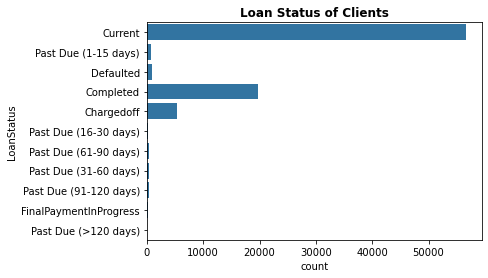

In [12]:
# setting base color
base_color = sb.color_palette()[0]
plt.title("Loan Status of Clients", fontweight='bold')
#plt.yticks("Loan Status", fontweight='bold')
sb.countplot(data = loan, y = 'LoanStatus', color = base_color);

Observation 1: 
- The majority of the loans in the data set are current loans.
- Most Loans were paid off before the 16th day mark
- Past-due loans are classified into numerous categories based on the length of the payment delay.
- Another significant component is completed loans; defaulted loans are a minority, but charged-off loans nevertheless constitute a significant portion.

### 2. Income Range

We'll look at the income range of the borrowers which is one of the features that are present as part of our exploratory process 

In [13]:
# checking the range of the income range column
loan.IncomeRange.value_counts()

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

We have some rows with "Not Employed", I'll change them to $0 so that we can plot them together

In [14]:
#replacing 'Not Employed' with '$0'
loan['IncomeRange'].replace(['Not employed'], '$0', inplace = True)
loan.IncomeRange.value_counts()

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
$0                  694
Name: IncomeRange, dtype: int64

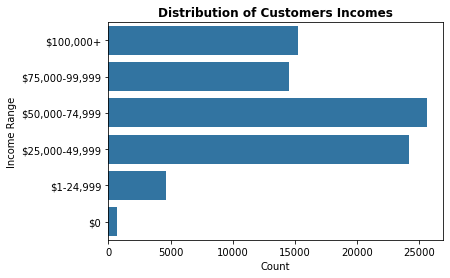

In [15]:
#bar chart
order = ['$100,000+','$75,000-99,999','$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
sb.countplot(data = loan, y = 'IncomeRange', color=base_color, order=order)
plt.ylabel('Income Range')
plt.xlabel('Count')
plt.title('Distribution of Customers Incomes', fontweight='bold');

Observation 2

- The Amount of people that have no income is only a small part of the total 
- Most of the customers fall in the '$50,000-74,999' and '$25,000-49,999' range.
- Those that earn $75k to $100k is almost the same with those that earn $100k+

Data Tidy 2
- I changed "Not Employed" to "$0"

### 3. Employment Status

The employment status of the borrower at the time they posted the listing.

In [16]:
#checking ranges of the column values
loan.EmploymentStatus.value_counts()

Employed         67310
Full-time         7927
Self-employed     4538
Other             3806
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

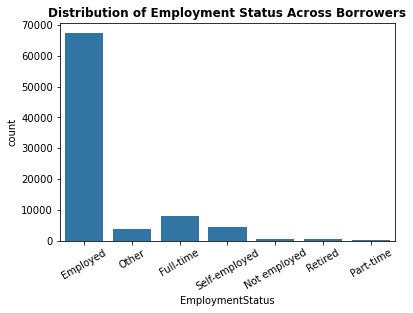

In [17]:
#Bar chart
plt.xticks(rotation=30)
sb.countplot(data=loan, x='EmploymentStatus', color=base_color );
plt.title("Distribution of Employment Status Across Borrowers", fontweight='bold');

Observation 3
- The 'Employed' persons make up most of the borrowers
- "Full-time" and "Self-employed" makes up most of the small groups

### 4. Interest Rate

The Borrower's interest rate for this loan. 

In [18]:
loan.BorrowerRate.value_counts()

0.3177    3672
0.3199    1645
0.2699    1314
0.1099     932
0.3500     802
          ... 
0.3094       1
0.1525       1
0.2125       1
0.2784       1
0.2665       1
Name: BorrowerRate, Length: 1229, dtype: int64

In [19]:
#getting the statistical description
loan.BorrowerRate.describe()

count    84853.000000
mean         0.196022
std          0.074631
min          0.040000
25%          0.135900
50%          0.187500
75%          0.257400
max          0.360000
Name: BorrowerRate, dtype: float64

We have to bin the values in order to make inferences from the data

In [20]:
# binning the values with the pandas cut()
bins = np.arange(0.04, loan.BorrowerRate.max()+0.04, 0.04)
loan['Binned_BorrowerRate'] = pd.cut(loan['BorrowerRate'], bins)

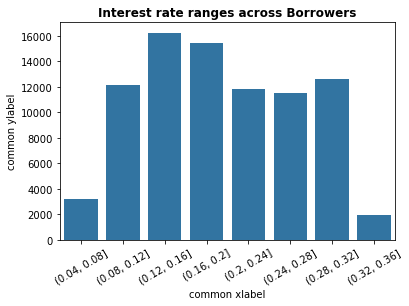

In [21]:
# bar chart
plt.title("Interest rate ranges across Borrowers", fontweight='bold')
plt.xticks(rotation=30)
plt.xlabel("Borrowers Rate")
ax = sb.countplot(data=loan, x='Binned_BorrowerRate', color=base_color);
ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

Observation 4
- Most of the borrowers interest rate ranges between (0.12 - 0.16) and (0.16 - 0.2)
- Interest rates that fall between (0.04 - 0.08) constitutes the least portion, same as (0.32 - 0.36)

### 5. Loan Term

The length of the loan expressed in months.

In [22]:
#Getting Value counts
loan.Term.value_counts()

36    58695
60    24545
12     1613
Name: Term, dtype: int64

In [23]:
loanlength = list(loan.Term.value_counts().sort_index())

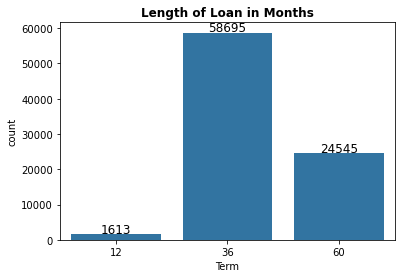

In [24]:
#bar chart
plt.title("Length of Loan in Months", fontweight='bold')
sb.countplot(data=loan, x="Term", color=base_color);
t=0
for i in loanlength:
    plt.text(x=t, y=i+300, s=i, ha='center', rotation=0, fontsize=12)
    t = t+1

Observation 5
- The most loan period is 36 months (3 Years)
- There are only 3 value options for the loan length which are 12 months(1 Year), 36 Months (3 Years) and 60 months (5 Years), which tells us that these are the only length offered by the company

### 6. Loan Origination Amount

The origination amount of the loan.

In [25]:
loan.LoanOriginalAmount.value_counts()

4000     13233
15000    11460
10000     9816
2000      4591
5000      4224
         ...  
11251        1
11113        1
6104         1
9119         1
19432        1
Name: LoanOriginalAmount, Length: 1934, dtype: int64

In [26]:
loan.LoanOriginalAmount.describe()

count    84853.000000
mean      9083.440515
std       6287.860058
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      13500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

In [27]:
# binning the values with the pandas cut()
bins = np.arange(loan.LoanOriginalAmount.min(), loan.LoanOriginalAmount.max()+4000, 4000)
loan['Binned_LoanOriginalAmount'] = pd.cut(loan['LoanOriginalAmount'], bins)

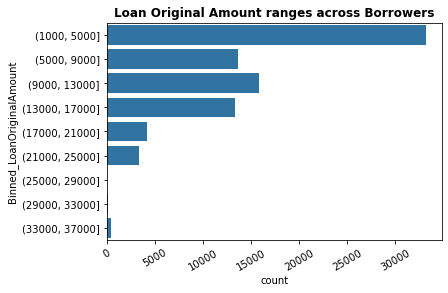

In [28]:
# bar chart
plt.title("Loan Original Amount ranges across Borrowers", fontweight='bold')
plt.xticks(rotation=30)
sb.countplot(data=loan, y='Binned_LoanOriginalAmount', color=base_color);


Observation 6
- The Bulk of the loan amount taken is Below $5,000
- Only few of the loan amount is above $25,000

### 7. Borrowers APR

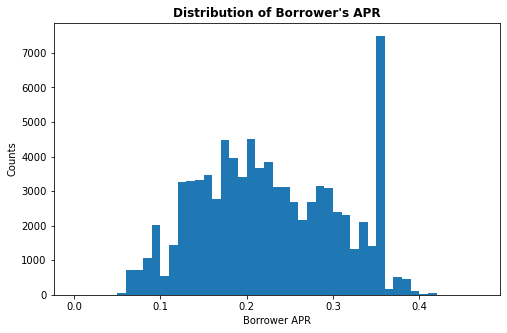

In [29]:
bins = np.arange(0, loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Counts');
plt.title("Distribution of Borrower's APR", fontweight='bold');

The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.42.  

In [30]:
# Check loans with APR greater than 0.43
loan[loan.BorrowerAPR>0.42]

index  Term  LoanStatus  BorrowerAPR  BorrowerRate  \
78885  105889    36  Chargedoff      0.42395          0.36   

      ProsperRating_Alpha  ListingCategory_Numeric EmploymentStatus  \
78885                  HR                        7         Employed   

       DelinquenciesLast7Years  StatedMonthlyIncome  TotalProsperLoans  \
78885                      2.0               2250.0                0.0   

       LoanOriginalAmount LoanOriginationDate  Recommendations  Investors  \
78885                1000          2010-11-12                0         42   

          IncomeRange Binned_BorrowerRate Binned_LoanOriginalAmount  
78885  $25,000-49,999        (0.32, 0.36]                       NaN

Next up, look at the distribution of the first predictor variable of interest: LoanOriginalAmount	

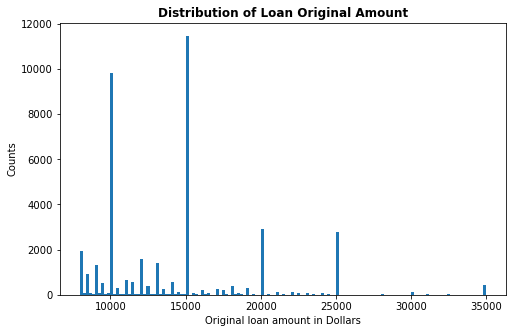

In [31]:
bins = np.arange(8000, loan.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount in Dollars');
plt.ylabel('Counts')
plt.title("Distribution of Loan Original Amount", fontweight='bold');

The very large spikes in frequency are at 10000, 15000, 20000, 25000, and 35000. There are also small spikes at 8000, 9000, 11000, 12000, 13000, 140000 etc. It means that most of the loans are multiples of 1000.

Now, look at the distributions of other variables of interest:
stated monthly income

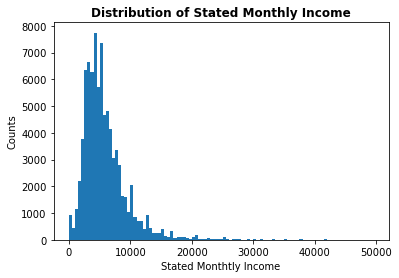

In [32]:
# Distribution of stated monthly income
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = loan, x = 'StatedMonthlyIncome', bins=bins_smi);
plt.xlabel('Stated Monthtly Income')
plt.ylabel('Counts')
plt.title("Distribution of Stated Monthly Income", fontweight='bold');

The distribution of stated monthly income is severely right screwed, with most of stated monthly income less than 30k.

In [33]:
# Check borrowers with stated monthly income greater than 100,000
loan[loan.StatedMonthlyIncome>100000]

index  Term LoanStatus  BorrowerAPR  BorrowerRate ProsperRating_Alpha  \
6056     8066    36  Completed      0.35643        0.3199                  HR   
12969   17411    36  Completed      0.35643        0.3199                   E   
26245   35218    36  Completed      0.07389        0.0705                  AA   
33523   45028    36    Current      0.33973        0.2999                   E   
39489   53014    12  Completed      0.25785        0.1795                   D   
39597   53167    36    Current      0.35797        0.3177                  HR   
42555   57133    36    Current      0.35643        0.3199                   E   
44147   59298    36    Current      0.24246        0.2049                   C   
59626   80075    36    Current      0.20217        0.1655                   C   
61718   82831    36    Current      0.31012        0.2710                   E   
82857  111265    60  Completed      0.20593        0.1819                   B   
84351  113270    36    Current      0.22712        0.1899                   C   

       ListingCategory_Numeric EmploymentStatus  DelinquenciesLast7Years  \
6056                         1         Employed                      2.0   
12969                        1         Employed                      5.0   
26245                        3        Full-time                      0.0   
33523                        1    Self-employed                      0.0   
39489                        3    Self-employed                      3.0   
39597                        3    Self-employed                      0.0   
42555                        2         Employed                      0.0   
44147                       20    Self-employed                      0.0   
59626                        1         Employed                      0.0   
61718                        1    Self-employed                      0.0   
82857                        1         Employed                      0.0   
84351                        7         Employed                      0.0   

       StatedMonthlyIncome  TotalProsperLoans  LoanOriginalAmount  \
6056          4.166667e+05                0.0                2000   
12969         4.833333e+05                0.0                7500   
26245         1.083333e+05                0.0                1000   
33523         1.500000e+05                1.0                4000   
39489         6.185478e+05                0.0                4000   
39597         1.750003e+06                0.0                4000   
42555         4.666667e+05                0.0                4000   
44147         1.208333e+05                0.0               15000   
59626         1.583333e+05                0.0               25000   
61718         2.500000e+05                0.0                4000   
82857         1.087500e+05                1.0               12765   
84351         3.944000e+05                0.0                2000   

      LoanOriginationDate  Recommendations  Investors IncomeRange  \
6056           2011-04-26                0         10   $100,000+   
12969          2011-05-06                0        128   $100,000+   
26245          2010-06-11                0         58   $100,000+   
33523          2012-05-17                0         15   $100,000+   
39489          2013-01-23                0         93   $100,000+   
39597          2012-02-24                0          2   $100,000+   
42555          2011-04-05                0         72   $100,000+   
44147          2012-03-20                0        204   $100,000+   
59626          2014-01-21                0          1   $100,000+   
61718          2012-09-21                0          6   $100,000+   
82857          2013-06-24                0        114   $100,000+   
84351          2013-02-26                0         26   $100,000+   

      Binned_BorrowerRate Binned_LoanOriginalAmount  
6056         (0.28, 0.32]          (1000.0, 5000.0]  
12969        (0.28, 0.32]          (5000.0, 9000.0]  
26245  

In [34]:
# Get percent of borrowers whose stated monthly income greater than 30k
(loan.StatedMonthlyIncome>30000).sum()/float(loan.shape[0])

0.0029344867005291504

Less than 0.3 percent of borrowers reported monthly incomes above $30,000. Since these borrowers may appear as outliers in the analysis that follows, it is preferable to delete borrower records for those who reported incomes above $30,000.

In [35]:
# remove loans with stated monthly income greater than 30k, which are outliers
loan = loan[loan.StatedMonthlyIncome<=30000]

Look at distributions of term, Prosper rating and employment status

In [36]:
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan['ProsperRating_Alpha'] = loan['ProsperRating_Alpha'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loan['EmploymentStatus'] = loan['EmploymentStatus'].astype(ordered_var)

fig, ax = plt.subplots(nrows=3, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = loan_sub, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = loan_sub, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = loan_sub, x = 'EmploymentStatus', color = default_color, ax = ax[2]);
plt.xticks(rotation=30);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Distribution of monthly declared income is really awkward: with a number of outliers and very huge range but yet it was right skew. The bulk of 
borrowers are employed and all other groups as little percentage of borrowers and most of the loans in the data set are truly current loans.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

To summarize our variables of interest, we looked at income, debt to income ratios, credit ratings, anticipated returns and actual returns for the data set.
The reported monthly income distributions are seriously fouled up. The majority of declared monthly salaries are less than 30,000. However, some of them are quite large, exceeding 100,000. Surprisingly, the majority of borrowers with more than 100k in monthly income only borrow up to 5k. Therefore, the extremely high claimed monthly income might be covered. Less than 0.3 percent of borrowers overall reported monthly income of more than 30,000. Because of this, these borrowers should probably be excluded from the following study.
.

## Bivariate Exploration


### Prosper Rating and Employment Status

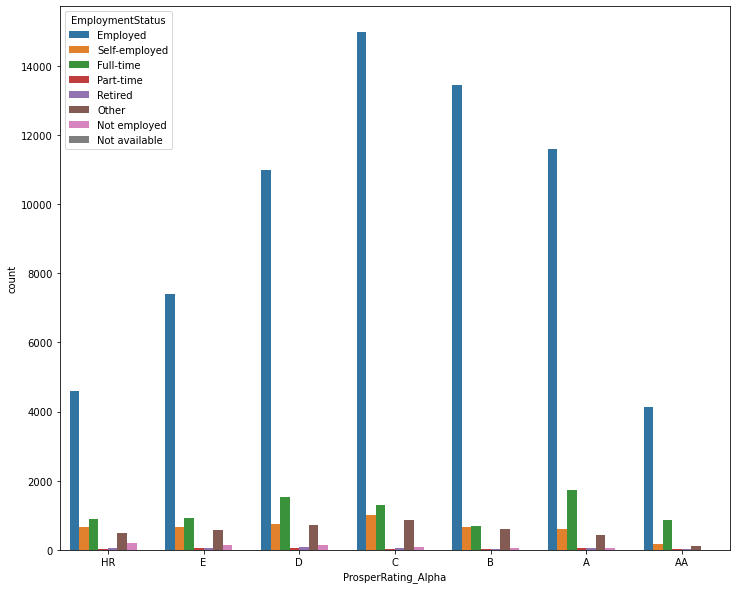

In [37]:
plt.figure(figsize = [12, 10])
sb.countplot(data = loan, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus');

Observation
* Lower ratings seem to have greater proportions of individuals with employment status Not Employed, Self-employed, Retired and Part-Time. 

### ---

Let's Start by looking at the pairwise correlations present between attributes in the data.

In [38]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
cat_vars = ['Term', 'ProsperRating_Alpha', 'EmploymentStatus']

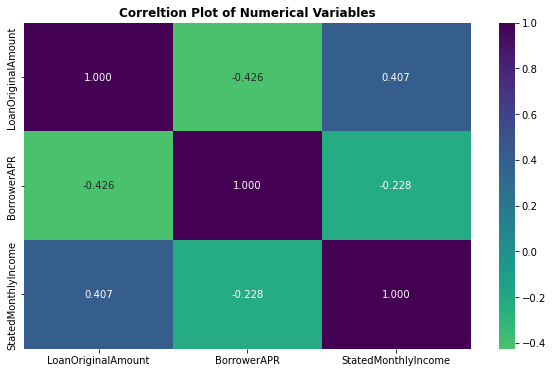

In [39]:
# correlation plot
plt.figure(figsize = [10, 6])
sb.heatmap(loan[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0);
plt.title("Correltion Plot of Numerical Variables", fontweight='bold');


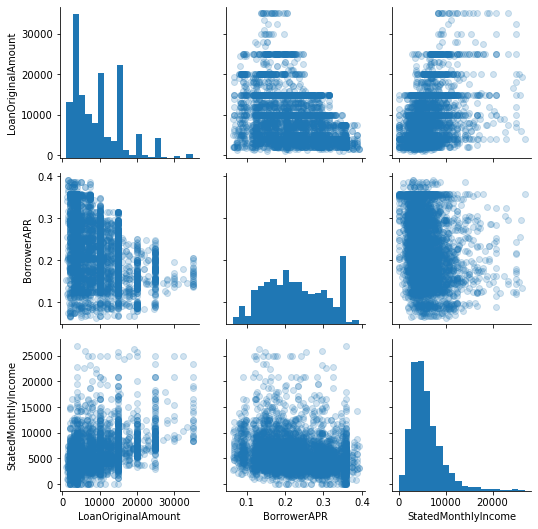

In [40]:
# plot matrix: sample 4000 loans so that plots are clearer and render faster
loan_sample = loan.sample(4000)
g = sb.PairGrid(data = loan_sample.dropna(), vars = num_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);
#plt.title("Pair Grid of Numerical Variables", fontweight='bold');

The correlation coefficient between borrower APR and loan initial amount is -0.323, and the scatter plot also reveals that these two variables are negatively connected, supporting our hypothesis that the greater the loan amount, the lower the APR. The loan amount is positively associated with the declared monthly income, which makes sense because borrowers with higher monthly incomes can borrow more money.

Let's see how borrower APR, stated monthly income, and loan original amount correlate with the category factors.

<Figure size 720x720 with 0 Axes>

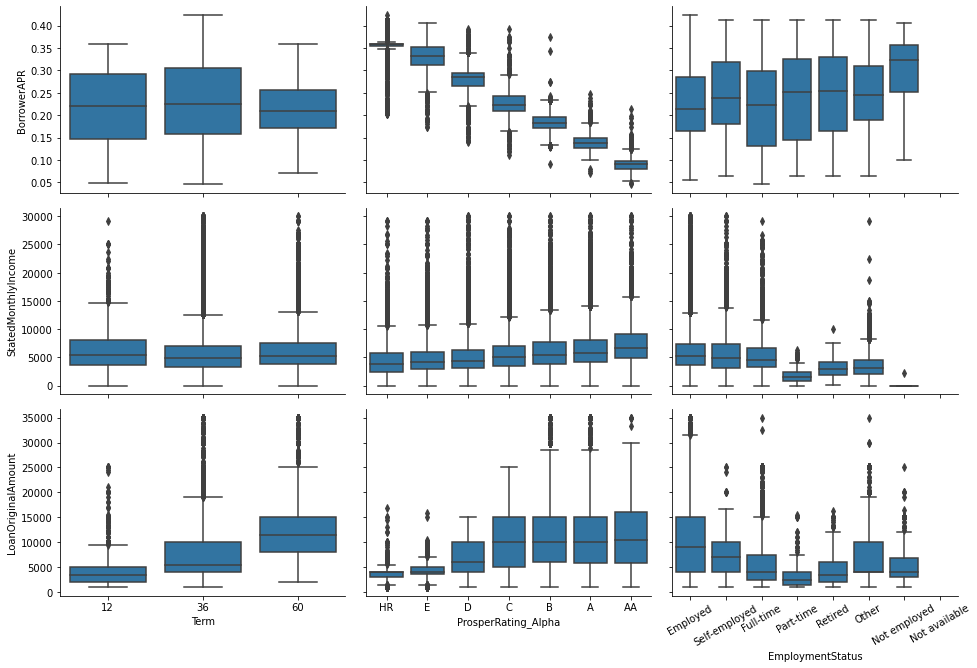

In [41]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    sb.boxplot(x=x, y=y, color = base_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = cat_vars, height = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

The graph indicates that as the loan duration lengthens, so does the loan amount. The lower the borrower APR, the lower the borrower APR. Borrowers who have received the highest Prosper ratings have the lowest APR. This suggests that the Prosper rating has a significant impact on borrower APR. Borrowers with higher credit scores have higher monthly income and loan amounts. Borrowers who are employed, self-employed, or work full-time have a higher monthly income and loan amount than part-time, retired, or unemployed borrowers.

Lastly, consider the connections between the three categorical features.

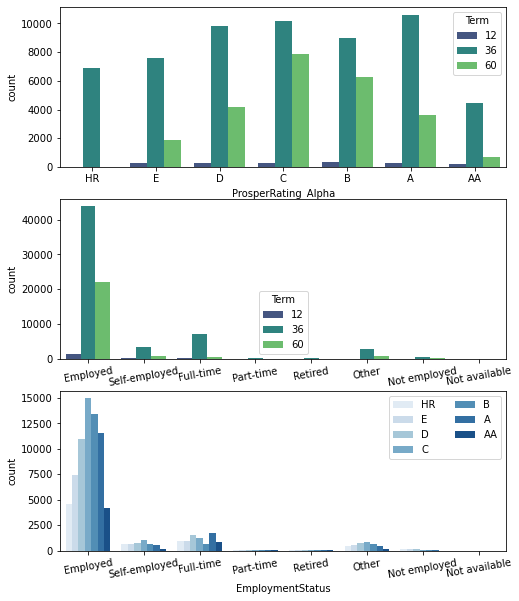

In [42]:
plt.figure(figsize = [8, 10])

# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
sb.countplot(data = loan, x = 'ProsperRating_Alpha', hue = 'Term', palette = 'viridis')

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan, x = 'EmploymentStatus', hue = 'Term', palette = 'viridis')
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan, x = 'EmploymentStatus', hue = 'ProsperRating_Alpha', palette = 'Blues')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

The job status variable lacks sufficient data for part-time, retired, and unemployed borrowers to demonstrate its interaction with the term and Prosper rating factors. However, we can observe that there is a relationship between word and Prosper rating. B and C ratings have a higher proportion of 60-month loans. HR rating borrowers can only get loans for 36 months.

With the preliminary look at bivariate relationships out of the way, I want to see how borrower APR and loan original amount are related to one another for all of the data.

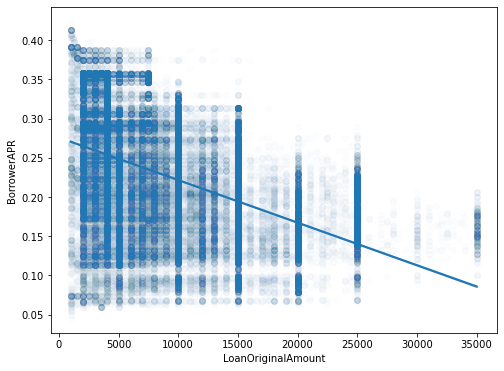

In [43]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

This plot indicates that the APR has a wide range at different loan amounts, but the range of APR decreases as the loan amount increases. Overall, the borrower APR is inversely related to the loan amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The borrower APR is inversely related to the loan amount, which implies that the bigger the loan amount, the lower the APR. It also indicates that the APR has a broad range at different loan amounts, but the range of APR diminishes as loan amount grows. The Prosper rating also has a substantial impact on the borrower APR, which reduces as the rating rises.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The loan amount is positively related with the claimed monthly income, which makes sense because borrowers with larger monthly salaries can borrow more money. It also reveals that consumers with higher credit ratings have higher monthly income and loan amounts. There is a relationship between the prosper rating and the phrase. B and C ratings have a higher share of 60-month loans. HR rating borrowers can only acquire loans for 36 months.swer here!

## Multivariate Exploration



The major issue I want to explore in this portion of the study is how the categorical variable (Prosper rating and term) factor into the link between borrower APR and loan initial amount.

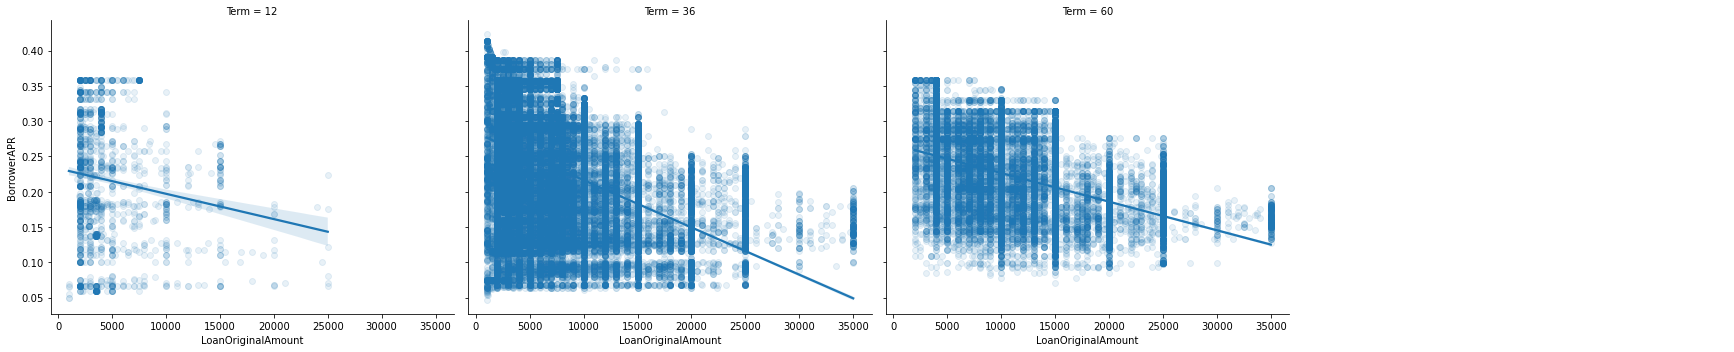

In [44]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

This shows that the loan term has no effect on the relationship betweeen the Borrowers APR and the Loan Amount

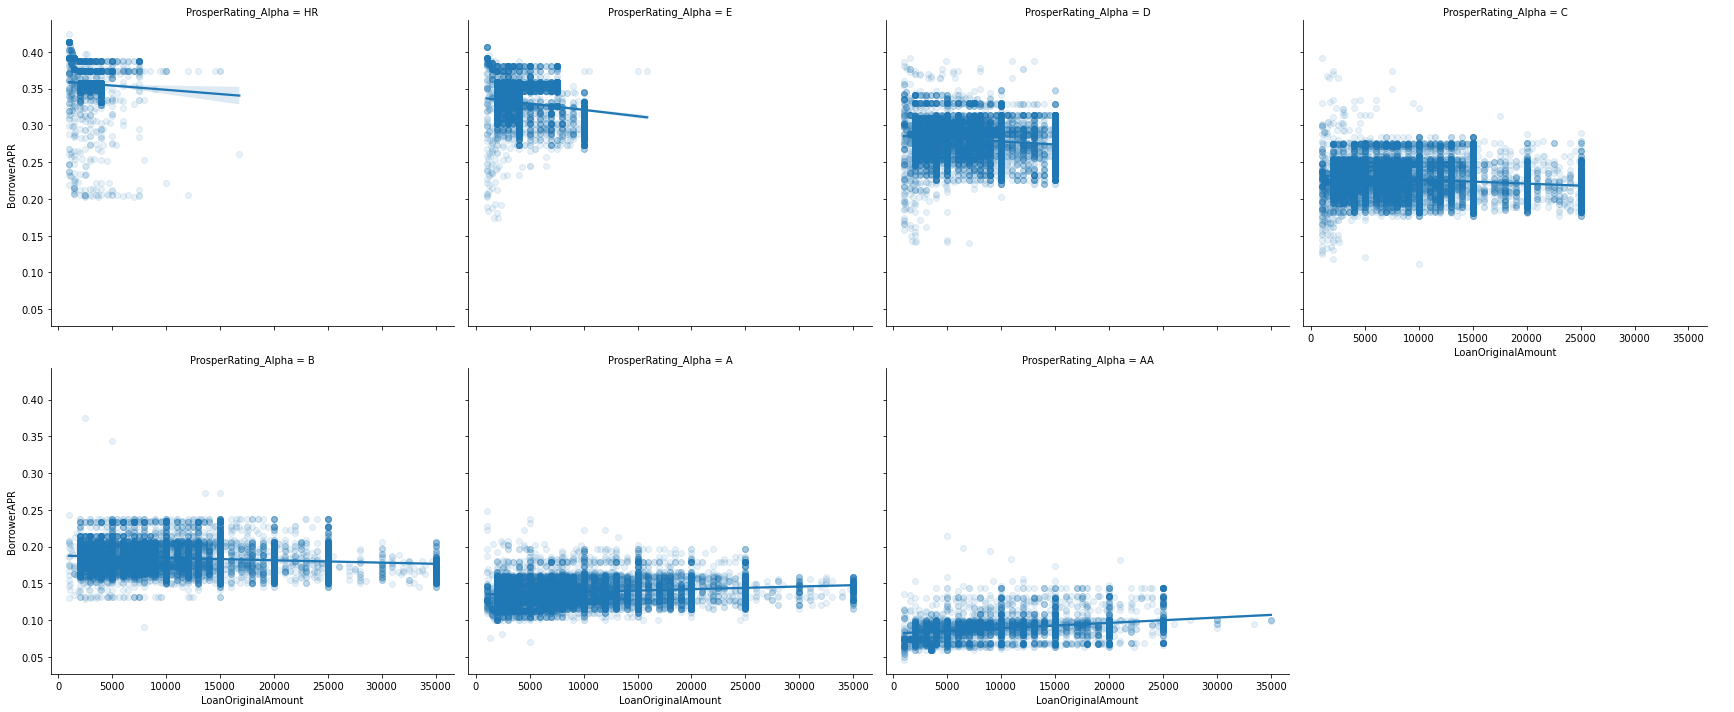

In [45]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan, aspect=1.2, height=5, col='ProsperRating_Alpha', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();


The loan amount increases with better rating. The borrower APR falls with improved rating. Interestingly, the link between borrower APR and loan amount shifts from negative to somewhat positive when the Prosper ratings are upgraded from HR to A or better. This may because persons with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But consumers with lower ratings tend to borrow less money, cutting APR could encourage them to borrow more.

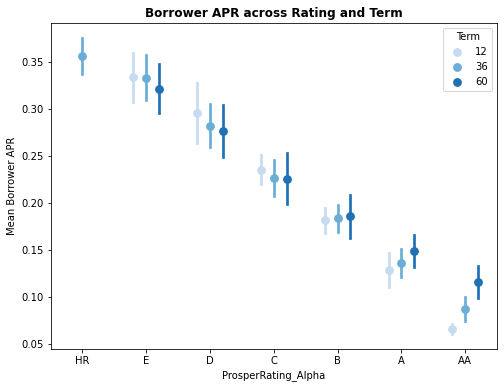

In [46]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan, x = 'ProsperRating_Alpha', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across Rating and Term', fontweight='bold')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

Interestingly, the borrower APR reduce with the rise of borrow term for those with HR-C raings. But for persons with B-AA scores, the APR grow with the increase of borrow duration.

Then, look at the rating and term effects on stated monthly income and loan initial amount variables

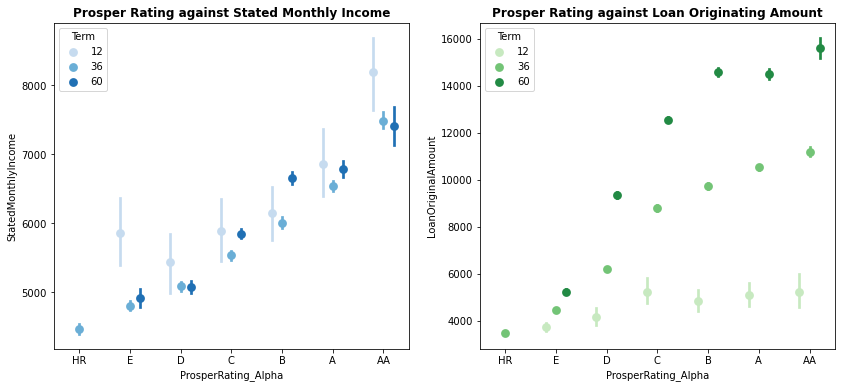

In [53]:
fig, ax = plt.subplots(ncols=2, figsize=[14,6])
sb.pointplot(data = loan, x = 'ProsperRating_Alpha', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = loan, x = 'ProsperRating_Alpha', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);
ax[0].set_title("Prosper Rating against Stated Monthly Income", fontweight='bold');
ax[1].set_title("Prosper Rating against Loan Originating Amount", fontweight='bold');

For stated monthly income, it doesn't look like there is an interaction impact between term and rating, the pattern of term is consistent among different ratings. But for loan amount, there is an interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms grows, the increase amplitude of loan amount between terms also becomes larger.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my analysis of borrower APR against loan amount by looking at the impact of the Prosper rating. The multivariate exploration demonstrated that the association between borrower APR and loan amount shifts from negative to somewhat positive when the Prosper ratings improved from HR to AA. I then studied the rating and term effects on loan amount, it showed that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also grows larger.

### Were there any interesting or surprising interactions between features?

A surprise interaction is that the borrower APR and loan amount is adversely connected when the Prosper ratings are from HR to B, but the association is turned to be positive when the ratings are A and AA. Another interesting point is that the borrower APR drop with the increase of borrow term for those with HR-C raings. But for customers with B-AA ratings, the APR increase with the borrow duration.